In [147]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
#read data
df = pd.read_csv("final.csv")
df.head()

,ID,Age,Gender,Working_Week (Yearly),Income,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Baby,Education_Status_Bachelors degree,Education_Status_College,...,Birth_Country (Mother)_Europe,Birth_Country (Mother)_North America,Birth_Country (Mother)_South America,Birth_Country (Mother)_US,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single
0,TRAIN_00000,63,0,4,425,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,TRAIN_00001,37,0,52,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,TRAIN_00002,58,1,52,860,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,TRAIN_00003,44,0,52,850,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,TRAIN_00004,37,1,52,570,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


/Users/forwarder1121/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


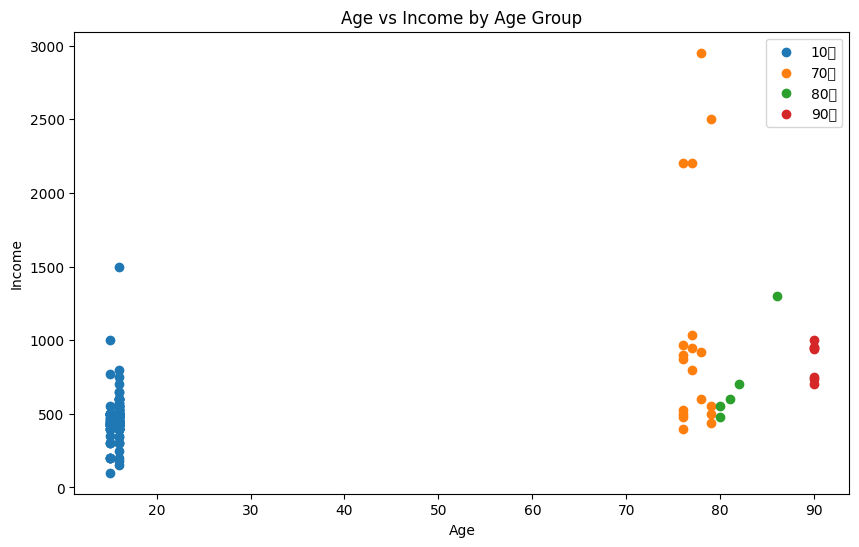

In [ ]:

# 나이가 17세 미만이면서 income이 0이 아닌 데이터 필터링
filtered_data = df[(df['Age'] < 17) & (df['Income'] != 0)]

# 나이가 75세 초과이면서 income이 0이 아닌 데이터 필터링하여 병합
filtered_data = pd.concat([filtered_data, df[(df['Age'] > 75) & (df['Income'] != 0)]])

# 10대, 20대, ... 세대별로 그룹화
age_groups = filtered_data.groupby((filtered_data['Age'] // 10) * 10)

# 산점도로 시각화
plt.figure(figsize=(10, 6))
for name, group in age_groups:
    plt.scatter(group['Age'], group['Income'], label=f'{name}대')
plt.title('Age vs Income by Age Group')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

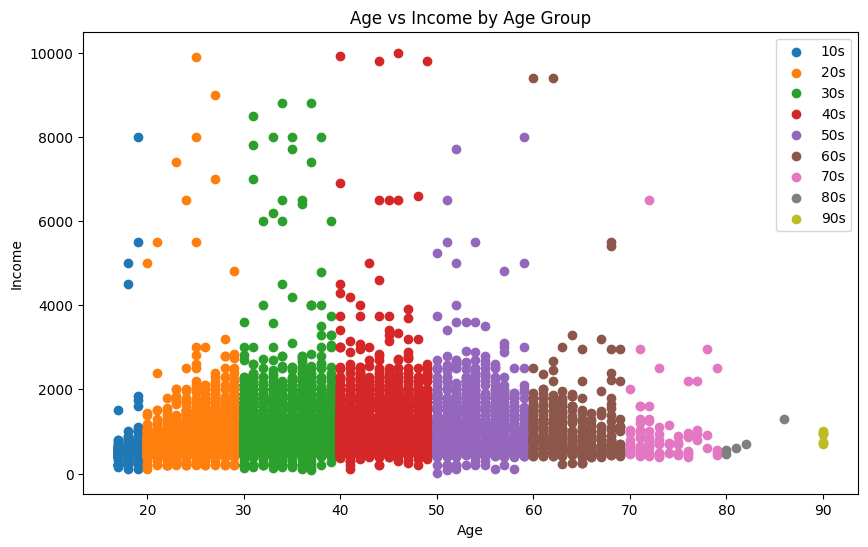

In [ ]:
# 제외할 데이터 설정
# 나이가 17세 미만이면서 소득이 0이 아닌 데이터
filtered_data = df[(df['Age'] >= 17) & (df['Income'] != 0)]
# 나이가 75세 초과이면서 소득이 0이 아닌 데이터
filtered_data = filtered_data[(filtered_data['Age'] <= 75) | (filtered_data['Income'] != 0)]

# 나이대별로 그룹화
age_groups = filtered_data.groupby((filtered_data['Age'] // 10) * 10)

# 그룹별 income 분포를 산점도로 시각화
plt.figure(figsize=(10, 6))
for name, group in age_groups:
    plt.scatter(group['Age'], group['Income'], label=f'{name}s')
plt.title('Age vs Income by Age Group')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

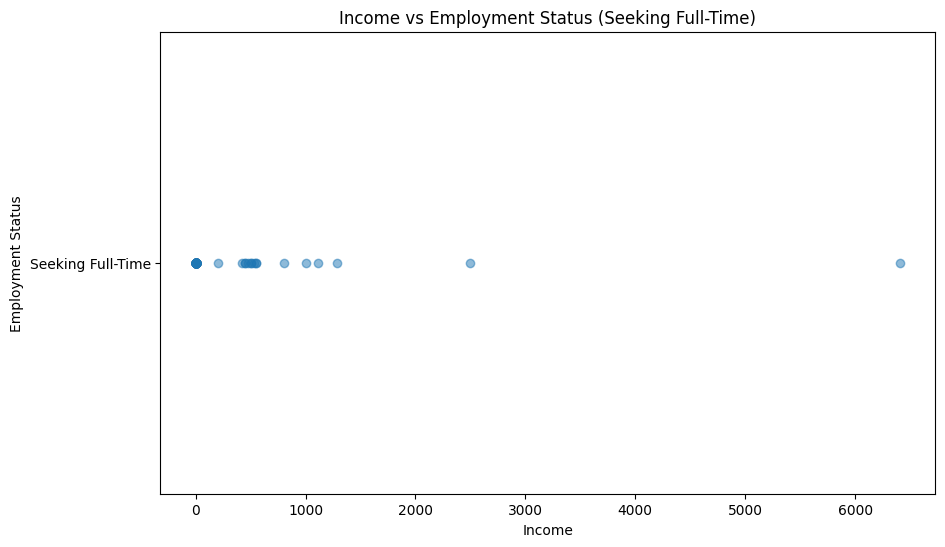

In [ ]:
# Employment_Status가 "Seeking Full-Time"인 데이터 추출
seeking_full_time_data = df[df['Employment_Status'] == 'Seeking Full-Time']

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(seeking_full_time_data['Income'], seeking_full_time_data['Employment_Status'], alpha=0.5)
plt.title('Income vs Employment Status (Seeking Full-Time)')
plt.xlabel('Income')
plt.ylabel('Employment Status')
plt.show()

In [ ]:
# "Seeking Full-Time"인 데이터에서 소득 값이 0인 개수
zero_income_count = (df['Employment_Status'] == 'Seeking Full-Time') & (df['Income'] == 0)

# "Seeking Full-Time"인 데이터에서 소득 값이 0이 아닌 개수
non_zero_income_count = (df['Employment_Status'] == 'Seeking Full-Time') & (df['Income'] != 0)

print("소득값이 0인 개수:", zero_income_count.sum())
print("소득값이 0이 아닌 개수:", non_zero_income_count.sum())


소득값이 0인 개수: 105
소득값이 0이 아닌 개수: 16


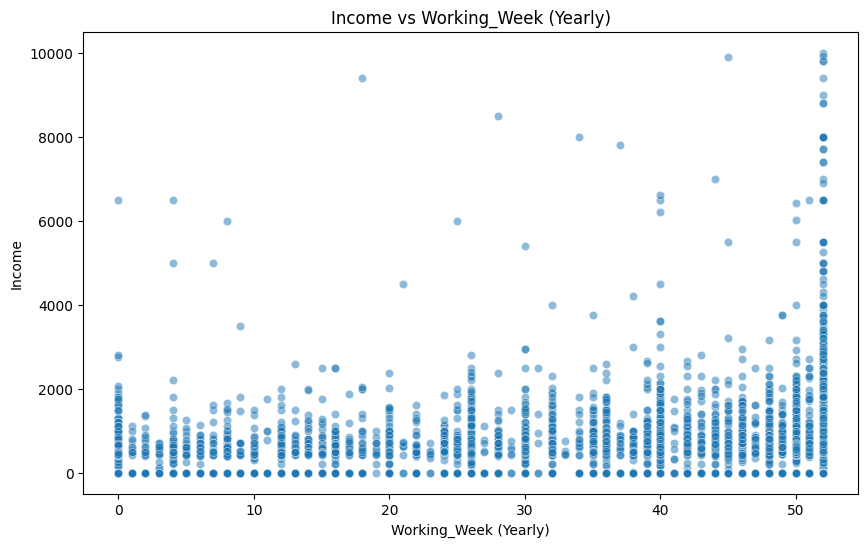

In [ ]:
# Working_Week (Yearly)에 따른 income의 분포 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Working_Week (Yearly)', y='Income', alpha=0.5)
plt.title('Income vs Working_Week (Yearly)')
plt.xlabel('Working_Week (Yearly)')
plt.ylabel('Income')
plt.show()


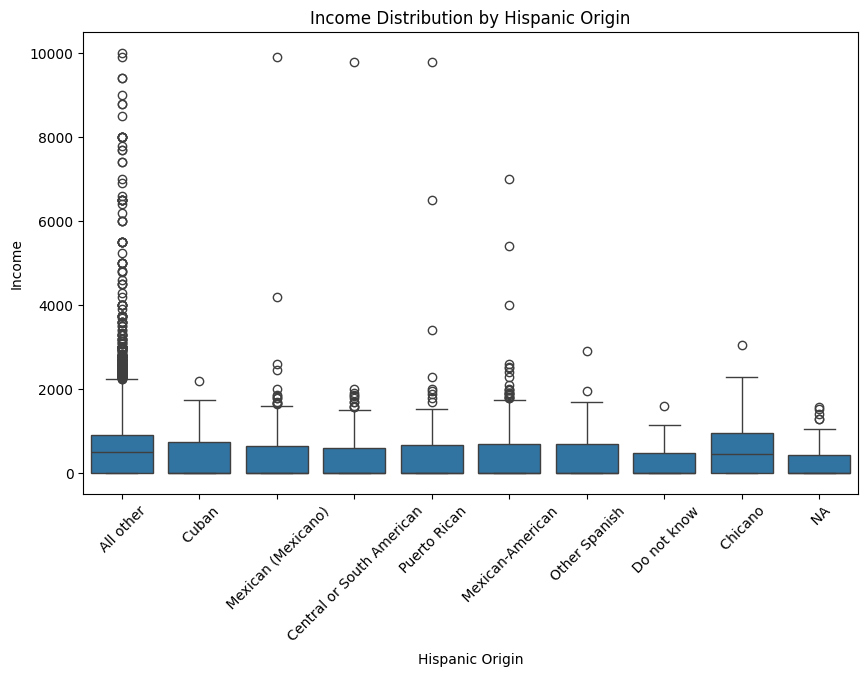

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Hispanic_Origin', y='Income')
plt.title('Income Distribution by Hispanic Origin')
plt.xlabel('Hispanic Origin')
plt.ylabel('Income')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()


In [ ]:
# tax_status가 "Nonfiler"이고 income이 0인 데이터 필터링
nonfiler_data = df[(df['Tax_Status'] == 'Nonfiler') & (df['Income'] == 0)]

# 필터링된 데이터의 개수와 전체 데이터의 개수 구하기
total_count = len(nonfiler_data)
total_rows = len(df)

# 비율 계산
zero_income_ratio = total_count / total_rows
print("tax_status가 Nonfiler이고 income이 0인 비율:", zero_income_ratio)

tax_status가 Nonfiler이고 income이 0인 비율: 0.17285


In [ ]:
# tax_status가 "Nonfiler"인 데이터 필터링
nonfiler_data = df[df['Tax_Status'] == 'Nonfiler']

# "income"이 0인 행의 개수 세기
zero_income_count = nonfiler_data[nonfiler_data['Income'] == 0].shape[0]

# 전체 "Nonfiler" 데이터의 개수 세기
total_nonfiler_count = nonfiler_data.shape[0]

# 비율 계산
zero_income_ratio = zero_income_count / total_nonfiler_count
print("tax_status가 Nonfiler이고 income이 0인 데이터의 비율:", zero_income_ratio)

tax_status가 Nonfiler이고 income이 0인 데이터의 비율: 0.8923593185338152


In [119]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기


# 데이터 전처리 (가상의 과정)
# 예시: 'Age'와 'Income'을 제외한 모든 열을 범주형 변수로 간주하고 원-핫 인코딩 수행

ready_X = df_encoded
ready_y = df['Income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(ready_X, ready_y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
rf = RandomForestRegressor(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# 모델 학습
rf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# # 하이퍼파라미터 튜닝 (예시)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
# }
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그 때의 성능
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score (RMSE): {(-grid_search.best_score_) ** 0.5}")


RMSE: 598.0604761245513
R²: 0.27349472841356937


In [ ]:
# 고유 국가 추출
unique_countries = set(df['Birth_Country (Father)'].unique()) | \
                   set(df['Birth_Country (Mother)'].unique()) | \
                   set(df['Birth_Country'].unique())

# 고유 국가 출력
print(unique_countries)

NameError: name 'df' is not defined

In [139]:
# Remove rows where 'Age' is below 17 or above 75
df = df[df['Age'].between(17, 75)]

# Remove rows with 'Employment Status' as 'Not Working' or 'Seeking Full-Time'
df = df[~df['Employment_Status'].isin(['Not Working', 'Seeking Full-Time'])]

# Drop the 'Gains', 'Losses', 'Dividends', 'Household_Status', 'Income_Status' columns
df.drop(['Gains', 'Losses', 'Dividends', 'Household_Status', 'Income_Status'], axis=1, inplace=True)

# Map 'Gender' values from 'M' and 'F' to 0 and 1, respectively
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Consolidate education levels and rename as specified
education_map = {
    'High graduate': 'High', 'High Senior': 'High', 
    'High Junior': 'High', 'High Sophomore': 'High',
    'Elementary (5-6)': 'Elementary(1-6)', 'Elementary (1-4)': 'Elementary(1-6)',
    'Kindergarten': 'Baby', 'Children': 'Baby'
}
df['Education_Status'] = df['Education_Status'].replace(education_map)


KeyError: "['Gains', 'Losses', 'Dividends', 'Household_Status', 'Income_Status'] not found in axis"

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15851 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      15851 non-null  object
 1   Age                     15851 non-null  int64 
 2   Gender                  15851 non-null  int64 
 3   Education_Status        15851 non-null  object
 4   Employment_Status       15851 non-null  object
 5   Working_Week (Yearly)   15851 non-null  int64 
 6   Industry_Status         15851 non-null  object
 7   Occupation_Status       15851 non-null  object
 8   Race                    15851 non-null  object
 9   Hispanic_Origin         15851 non-null  object
 10  Martial_Status          15851 non-null  object
 11  Household_Summary       15851 non-null  object
 12  Citizenship             15851 non-null  object
 13  Birth_Country           14322 non-null  object
 14  Birth_Country (Father)  13728 non-null  object
 15  Birth_C

In [ ]:
print(len(df))

15851


In [ ]:
df.to_csv('one.csv', index=False)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15851 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      15851 non-null  object
 1   Age                     15851 non-null  int64 
 2   Gender                  15851 non-null  int64 
 3   Education_Status        15851 non-null  object
 4   Employment_Status       15851 non-null  object
 5   Working_Week (Yearly)   15851 non-null  int64 
 6   Industry_Status         15851 non-null  object
 7   Occupation_Status       15851 non-null  object
 8   Race                    15851 non-null  object
 9   Hispanic_Origin         15851 non-null  object
 10  Martial_Status          15851 non-null  object
 11  Household_Summary       15851 non-null  object
 12  Citizenship             15851 non-null  object
 13  Birth_Country           14322 non-null  object
 14  Birth_Country (Father)  13728 non-null  object
 15  Birth_C

In [140]:

# 국가를 대륙으로 매핑하는 딕셔너리
country_continent_dict = {
 'US': 'US',
 'Cuba': 'North America',
 'Portugal': 'Europe',
 'Mexico': 'North America',
 'Unknown': 'US',
 'Puerto-Rico': 'North America',
 'Germany': 'Europe',
 'Japan': 'Asia',
 'Poland': 'Europe',
 'Columbia': 'South America',
 'Philippines': 'Asia',
 'Italy': 'Europe',
 'Trinadad&Tobago': 'South America',
 'England': 'Europe',
 'South Korea': 'Asia',
 'Iran': 'Asia',
 'France': 'Europe',
 'India': 'Asia',
 'China': 'Asia',
 'Dominican-Republic': 'North America',
 'Scotland': 'Europe',
 'Ecuador': 'South America',
 'Nicaragua': 'North America',
 'Peru': 'South America',
 'Cambodia': 'Asia',
 'Canada': 'North America',
 'Jamaica': 'North America',
 'Vietnam': 'Asia',
 'Hong Kong': 'Asia',
 'Thailand': 'Asia',
 'Haiti': 'North America',
 'Guatemala': 'North America',
 'Laos': 'Asia',
 'Yugoslavia': 'Europe',
 'Ireland': 'Europe',
 'El-Salvador': 'North America',
 'Panama': 'North America',
 'Honduras': 'North America',
 'Greece': 'Europe',
 'Outlying-U S (Guam USVI etc)': 'US',
 'Hungary': 'Europe',
 'Taiwan': 'Asia',
 'Holand-Netherlands': 'Europe'
}

# 업데이트할 열 목록: 본인 출신국가, 엄마 출신국가, 아빠 출신국가
columns_to_update = ['Birth_Country', 'Birth_Country (Mother)', 'Birth_Country (Father)']

# 각 열에 대해 국가를 대륙으로 매핑
for column in columns_to_update:
    df[column] = df[column].map(country_continent_dict)

# 변경된 데이터 확인을 위한 상위 5행 출력
print(df.head())

            ID  Age  Gender                Education_Status Employment_Status  \
0  TRAIN_00000   63       0                    Middle (7-8)         Full-Time   
1  TRAIN_00001   37       0  Associates degree (Vocational)         Full-Time   
2  TRAIN_00002   58       1                            High         Full-Time   
3  TRAIN_00003   44       0                            High         Full-Time   
4  TRAIN_00004   37       1                            High         Full-Time   

   Working_Week (Yearly)              Industry_Status  \
0                      4              Social Services   
1                     52                Entertainment   
2                     52  Manufacturing (Non-durable)   
3                     52                       Retail   
4                     52                       Retail   

                  Occupation_Status   Race Hispanic_Origin Martial_Status  \
0                          Services  White       All other        Married   
1               

/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_20344/3532213466.py:16: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_20344/3532213466.py:16: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_20344/3532213466.py:16: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_20344/3532213466.py:16: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  plt.tight_layout()
/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_20344/3532213466.py:16: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_20344/3532213466.py:16: UserWar

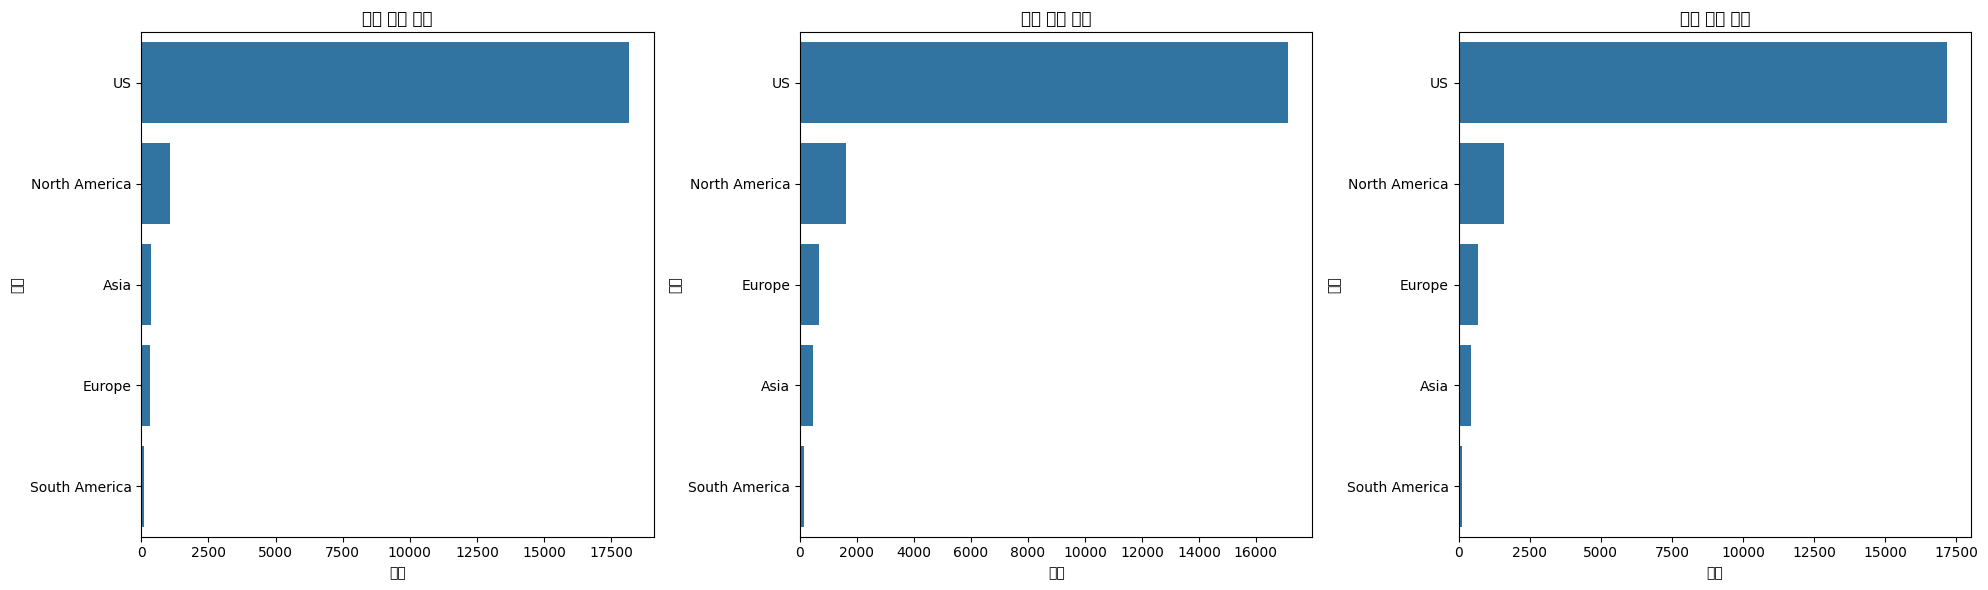

In [122]:

# 데이터 준비
columns_to_visualize = ['Birth_Country', 'Birth_Country (Mother)', 'Birth_Country (Father)']
titles = ['본인 출신 대륙', '엄마 출신 대륙', '아빠 출신 대륙']

# 시각화 설정
plt.figure(figsize=(20, 6))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, 3, i)
    continent_counts = df[column].value_counts()
    sns.barplot(x=continent_counts, y=continent_counts.index)
    plt.title(titles[i-1])
    plt.xlabel('빈도')
    plt.ylabel('대륙')

plt.tight_layout()
plt.show()

In [123]:
df.to_csv("two.csv", index=False)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15851 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      15851 non-null  object
 1   Age                     15851 non-null  int64 
 2   Gender                  15851 non-null  int64 
 3   Education_Status        15851 non-null  object
 4   Employment_Status       15851 non-null  object
 5   Working_Week (Yearly)   15851 non-null  int64 
 6   Industry_Status         15851 non-null  object
 7   Occupation_Status       15851 non-null  object
 8   Race                    15851 non-null  object
 9   Hispanic_Origin         15851 non-null  object
 10  Martial_Status          15851 non-null  object
 11  Household_Summary       15851 non-null  object
 12  Citizenship             15851 non-null  object
 13  Birth_Country           14322 non-null  object
 14  Birth_Country (Father)  13728 non-null  object
 15  Birth_C

In [141]:
df["Birth_Country (Father)"].unique()

array(['US', nan], dtype=object)

In [ ]:
df